# Importing BigMart Sales data using Pandas

In [1]:
import pandas as pd

data = pd.read_csv("Train.csv")

df = pd.DataFrame(data)

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Checking Null values in data and replacing it with the mean of that feature

In [3]:
data['Item_Weight'].notnull().sum()

7060

In [4]:
data['Item_Weight'].isnull().sum()

1463

In [5]:
meanW = data['Item_Weight'].mean()

In [6]:
modeW = data['Item_Weight'].mode()

In [7]:
medianW = data['Item_Weight'].median()

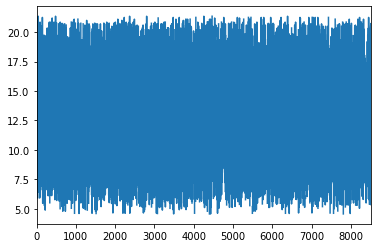

In [10]:
data['Item_Weight'].plot()

In [11]:
meanW

12.857645184136183

In [12]:
modeW

0    12.15
dtype: float64

In [13]:
medianW

12.6

In [14]:
data['Item_Weight'].fillna(meanW, inplace = True)

In [15]:
data['Item_Weight'].isnull().sum()

0

# Feature Engg. on age and fat content 

In [16]:
age = []
for i in data['Outlet_Establishment_Year']:
    a = 2020 - i
    age.append(a)

In [17]:
len(age)

8523

In [18]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [20]:
df['AGE'] = pd.Series(age).values

In [21]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'AGE'],
      dtype='object')

In [22]:
df = df.drop(['Outlet_Establishment_Year'],axis = 1)

In [23]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'AGE'],
      dtype='object')

In [24]:
pd.get_dummies(df['Item_Fat_Content']).sum()

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
dtype: int64

In [31]:
low = ['Low Fat', 'LF', 'low fat']
reg = ['Regular', 'reg']
fat_content = []
for i in data['Item_Fat_Content']:
    for j in low:
        if i == j:
            fat_content.append(0)
    for k in reg:
        if i == k:
            fat_content.append(1)

In [32]:
len(fat_content)

8523

In [27]:
reg = ['Regular', 'reg']
for i in data['Item_Fat_Content']:
    for j in reg:
        if i == j:
            fat_content.append(1)
            

In [33]:
fat_content

[0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [36]:
df['Fat_Content'] = pd.Series(fat_content).values

In [38]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,AGE,Fat_Content
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21,0
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11,1
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21,0
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,22,1
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33,0
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,11,1
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,33,1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,35,0
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986,18,1
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,13,1


In [40]:
df = df.drop(['Item_Fat_Content'], axis = 1)

In [41]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,AGE,Fat_Content
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21,0
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11,1
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21,0
3,FDX07,19.200,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,22,1
4,NCD19,8.930,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,33,0
8519,FDS36,8.380,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,18,1
8520,NCJ29,10.600,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,16,0
8521,FDN46,7.210,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,11,1


In [42]:
data = df

In [43]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,AGE,Fat_Content
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,22.168133,0.352693
std,4.226124,0.051598,62.275067,1706.499616,8.371760,0.477836
min,4.555000,0.000000,31.290000,33.290000,11.000000,0.000000
25%,9.310000,0.026989,93.826500,834.247400,16.000000,0.000000
50%,12.857645,0.053931,143.012800,1794.331000,21.000000,0.000000
75%,16.000000,0.094585,185.643700,3101.296400,33.000000,1.000000
max,21.350000,0.328391,266.888400,13086.964800,35.000000,1.000000


# Checking categorical features from all

In [50]:
for i in data.columns:
    obj = data[i]
    freq={}
    for j in range(0,len(obj)):
        res = obj[j]
        if res in freq:
            freq[res] +=1
        else:
            freq[res] = 1
    if len(freq) < 50:
        print([i],"\n",freq," \n")
        #data = data[i].astype('category')
        #print(data[i].dtype)

['Item_Type'] 
 {'Dairy': 682, 'Soft Drinks': 445, 'Meat': 425, 'Fruits and Vegetables': 1232, 'Household': 910, 'Baking Goods': 648, 'Snack Foods': 1200, 'Frozen Foods': 856, 'Breakfast': 110, 'Health and Hygiene': 520, 'Hard Drinks': 214, 'Canned': 649, 'Breads': 251, 'Starchy Foods': 148, 'Others': 169, 'Seafood': 64}  

['Outlet_Identifier'] 
 {'OUT049': 930, 'OUT018': 928, 'OUT010': 555, 'OUT013': 932, 'OUT027': 935, 'OUT045': 929, 'OUT017': 926, 'OUT046': 930, 'OUT035': 930, 'OUT019': 528}  

['Outlet_Size'] 
 {'Medium': 2793, nan: 2410, 'High': 932, 'Small': 2388}  

['Outlet_Location_Type'] 
 {'Tier 1': 2388, 'Tier 3': 3350, 'Tier 2': 2785}  

['Outlet_Type'] 
 {'Supermarket Type1': 5577, 'Supermarket Type2': 928, 'Grocery Store': 1083, 'Supermarket Type3': 935}  

['AGE'] 
 {21: 930, 11: 928, 22: 555, 33: 932, 35: 1463, 18: 929, 13: 926, 23: 930, 16: 930}  

['Fat_Content'] 
 {0: 5517, 1: 3006}  



# Checking the features and their dtypes

In [52]:
len(data.columns)

12

In [53]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'AGE', 'Fat_Content'],
      dtype='object')

In [54]:
data.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
AGE                       int64
Fat_Content               int64
dtype: object

In [56]:
data1 = data['Fat_Content'].astype('category')

In [57]:
data1.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [59]:
data['Fat_Content']

0       0
1       1
2       0
3       1
4       0
       ..
8518    0
8519    1
8520    0
8521    1
8522    0
Name: Fat_Content, Length: 8523, dtype: int64

# Using Matplotlib to plot some graphs and fetch some useful insights from the data

In [60]:
import matplotlib.pyplot as plt
import seaborn as sb

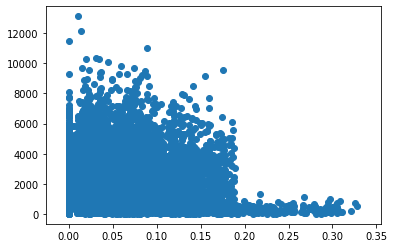

In [61]:
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])

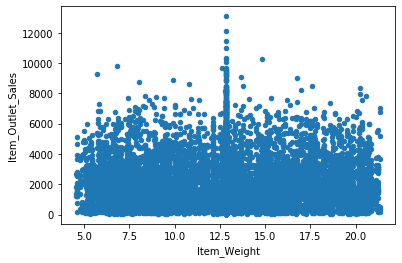

In [62]:
data.plot(kind='scatter',x='Item_Weight', y = 'Item_Outlet_Sales')

(array([ 928.,  926.,    0.,    0.,  930.,  929.,    0.,    0.,  930.,
         555.,  930.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         932., 1463.]),
 array([11. , 12.2, 13.4, 14.6, 15.8, 17. , 18.2, 19.4, 20.6, 21.8, 23. ,
        24.2, 25.4, 26.6, 27.8, 29. , 30.2, 31.4, 32.6, 33.8, 35. ]),
 <a list of 20 Patch objects>)

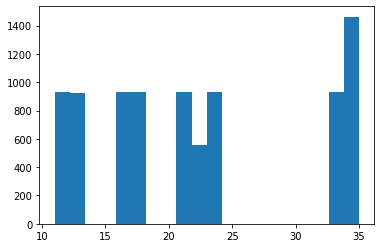

In [63]:
plt.hist(data['AGE'], bins =20)

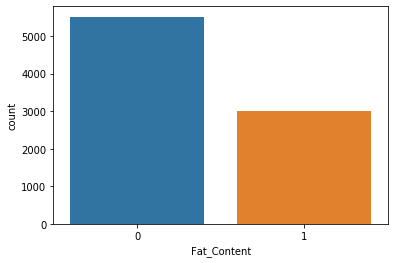

In [69]:
sb.countplot(x = 'Fat_Content', data = df)

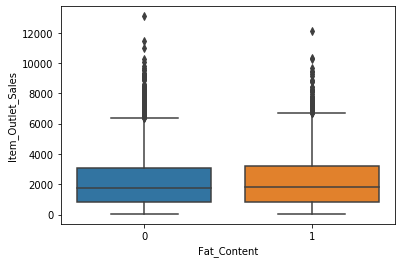

In [71]:
sb.boxplot(data['Fat_Content'], data['Item_Outlet_Sales'])

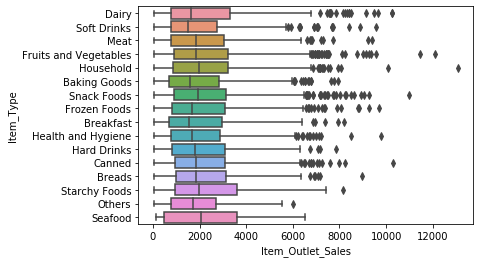

In [72]:
sb.boxplot(data['Item_Outlet_Sales'], data['Item_Type'])

### Graph link - http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/DataPresentation/DataPresentation7.html

### Pandas - https://towardsdatascience.com/how-to-master-pandas-8514f33f00f6

In [73]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,AGE,Fat_Content
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21,0
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11,1
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21,0
3,FDX07,19.200,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,22,1
4,NCD19,8.930,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,33,0
8519,FDS36,8.380,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,18,1
8520,NCJ29,10.600,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,16,0
8521,FDN46,7.210,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,11,1


In [74]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [75]:
T3 =df.loc[df['Outlet_Location_Type'] == 'Tier 3' , 'Item_Outlet_Sales'].sum()
T3

7636752.631999999

In [76]:
T2 = df.loc[df['Outlet_Location_Type'] == 'Tier 2' , 'Item_Outlet_Sales'].sum()
T2

6472313.7064000005

In [77]:
T1=df.loc[df['Outlet_Location_Type'] == 'Tier 1' , 'Item_Outlet_Sales'].sum()
T1

4482059.072000001

In [78]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [79]:
S1=df.loc[df['Outlet_Type'] == 'Supermarket Type1' , 'Item_Outlet_Sales'].sum()
S1

12917342.263

In [80]:
S2=df.loc[df['Outlet_Type'] == 'Supermarket Type2' , 'Item_Outlet_Sales'].sum()
S2

1851822.83

In [81]:
S3=df.loc[df['Outlet_Type'] == 'Supermarket Type3' , 'Item_Outlet_Sales'].sum()
S3

3453926.0514

In [82]:
GS=df.loc[df['Outlet_Type'] == 'Grocery Store' , 'Item_Outlet_Sales'].sum()
GS


368034.266

In [83]:
lis_col=[T1,T2,T3]
lis_col

[4482059.072000001, 6472313.7064000005, 7636752.631999999]

In [84]:
lis_col_type=[S1+GS,S2,S3]
lis_col_type

[13285376.529000001, 1851822.83, 3453926.0514]